# Notebook Instructions
<i>You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

# Machine learning

In this notebook, we will create a decision tree classifier by learning the decision rules from the training data and use this decision tree in the test data to predict whether the option price will go up (+1) or go down (-1) tomorrow.

We will follow the below steps:

1. Define predictor variables
2. Split the data into train and test dataset
3. Create a decision tree classifier using the test data
4. Compute the accuracy of the decision tree classifier
5. Plot the performance of the classifier in the test data

## Import the libraries

In [1]:
# Data manipulation and mathematical functions
import pandas as pd
import numpy as np

# Machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Plot
import matplotlib.pyplot as plt

## Read data

Here we collect the  data from <a href=https://nseindia.com/products/content/derivatives/equities/historical_fo.htm>nseindia</a> and save it as a CSV File. Then, use the read_csv function to import the CSV file as a data frame.


In [2]:
Nifty_data = pd.read_csv('../data_modules/Nifty_ML_data.csv')
Nifty_data.head()

,Date,Expiry,Future_Close,Strike Price,Time_to_Expiry,LTP,IV,Delta,Gamma,Vega,Theta
0,2016-11-28,2017-01-25,8172.00,9000,58,9.20,14.343262,0.048521,0.000216,3.280132,-0.405584
1,2016-11-29,2017-01-25,8210.00,9000,57,7.90,13.488770,0.044860,0.000216,3.067564,-0.362962
2,2016-11-30,2017-01-25,8287.00,9000,56,9.95,13.061523,0.056179,0.000267,3.671850,-0.428214
3,2016-12-01,2017-01-25,8245.10,9000,55,8.20,13.305664,0.047429,0.000232,3.164577,-0.382789
4,2016-12-02,2017-01-25,8141.75,9000,54,8.00,14.923096,0.042963,0.000195,2.859500,-0.395117


## Predictor variables

The predictor variables are used as the decision criteria to predict whether the option price will go up (+1) or go down (-1) tomorrow. It consists of variables such as IV (implied volatility), Delta, Gamma, Theta, and Vega.

In [3]:
predictors = Nifty_data[['IV', 'Delta', 'Gamma', 'Theta', 'Vega']]
predictors.head()

,IV,Delta,Gamma,Theta,Vega
0,14.343262,0.048521,0.000216,-0.405584,3.280132
1,13.488770,0.044860,0.000216,-0.362962,3.067564
2,13.061523,0.056179,0.000267,-0.428214,3.671850
3,13.305664,0.047429,0.000232,-0.382789,3.164577
4,14.923096,0.042963,0.000195,-0.395117,2.859500


## Compute the actual signal

If tomorrow's predicted price is greater than today's price then we will buy the option, else we will sell the option. We will store +1 for buy and -1 for sell in a target numpy array.

In [4]:
target = np.where(Nifty_data.LTP.shift(-1) > Nifty_data.LTP, 1, -1)

## Define the train and the test data

We will split data into training and test set. 

1. First 70 days data is used for training and remaining data for testing
2. predictors_train & target_train are training dataset
3. predictors_test & target_test are test dataset

In [5]:
# Number of days to train algo
t = 70
# Train dataset
predictors_train = predictors[:t]
target_train = target[:t]
# Test dataset
predictors_test = predictors[t:]
target_test = target[t:]

## Classification

### Decision tree classifier
We will use DecisionTreeClassifier() function for classification. The parameters used in this function are:

1. <font color=blue>max_depth:</font> It denotes maximum depth of the tree. It takes any integer value. 
2. <font color=blue>min_samples_split:</font> It is the minimum number of samples required to split a node. 
3. <font color=blue>max_leaf_nodes:</font> It defines the maximum number of possible leaf nodes. 

### Fit the classifier

We will create our decision tree classifier model using the fit() method on the training dataset.

In [6]:
cls = DecisionTreeClassifier(
    max_depth=6, min_samples_split=2, max_leaf_nodes=8)
cls.fit(predictors_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Classifier accuracy

We will compute the accuarcy of the algorithm on the test data, by comparing the actual values in the test data with the predicted values for the test data. The function accuracy_score() will be used to calculate the accuracy.

<B>Syntax:</B> accuracy_score(<font color=blue>target_actual_value</font>,<font color=blue>target_predicted_value</font>)
1. <font color=blue>target_actual_value:</font> correct signal values
2. <font color=blue>target_predicted_value:</font> predicted signal values

In [7]:
accuracy_train = accuracy_score(target_train, cls.predict(predictors_train))
accuracy_test = accuracy_score(target_test, cls.predict(predictors_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 80.00%
Test Accuracy: 55.74%


An accuracy of 50%+ in the test data suggests that the decision tree classifier is effective.

## Strategy performance

### Predict signal 

We will predict the signal (buy or sell) in the test dataset.

### Compute returns in the test period

We will compute and plot the cumulative strategy returns based on the predicted signal.

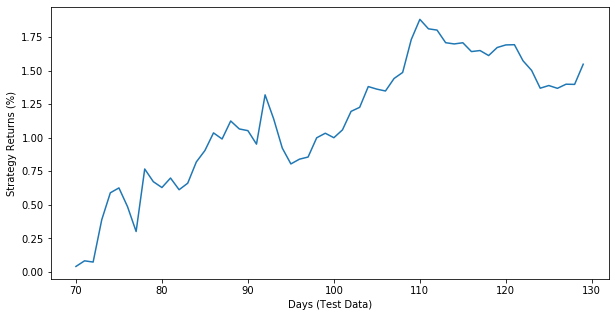

In [8]:
Nifty_data['Predicted_Signal'] = cls.predict(predictors)

# Calculate the returns
# LTP is the last traded price
Nifty_data['Return'] = (Nifty_data.LTP.shift(-1) / Nifty_data.LTP)-1
Nifty_data['Strategy_return'] = Nifty_data.Return * Nifty_data.Predicted_Signal
Nifty_data.Strategy_return.iloc[t:].cumsum().plot(figsize=(10, 5))
plt.xlabel("Days (Test Data)")
plt.ylabel("Strategy Returns (%)")
plt.show()

In the next unit, there will be an interactive exercise. All the best!